In [66]:
#FinanceDada/FinanceDataReader: Financial data reader

In [67]:
# FinanceData 설치
# ! : prompt환경의 명령을 실행
# !pip install finance-datareader

In [1]:
# 라이브러리 불러오기
import FinanceDataReader as fdr

In [2]:
# 버전확인
fdr.__version__

'0.9.94'

## 한국거래소 상장종목 전체 가져오기

In [70]:
# 패키지 내용 확인
dir(fdr)

['DataReader',
 'EtfListing',
 'SnapDataReader',
 'StockListing',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_utils',
 'chart',
 'data',
 'ecos',
 'fred',
 'investing',
 'krx',
 'nasdaq',
 'naver',
 'plot',
 'wikipedia',
 'yahoo']

In [71]:
# 함수, method 사용 방법을 알고 싶을때
# help(fdr.StockListing)
fdr.StockListing?

Signature: fdr.StockListing(market: str, start=None, end=None) -> pandas.core.frame.DataFrame
Docstring:
read stock list of stock exchanges
* market: 'KRX', 'KOSPI', 'KOSDAQ', 'KONEX', 'KRX-MARCAP', 
        'KRX-DESC', 'KOSPI-DESC', 'KOSDAQ-DESC', 'KONEX-DESC',
        'KRX-DELISTING', 'KRX-ADMINISTRATIVE', 'KRX-MARCAP',
        'NASDAQ', 'NYSE', 'AMEX', 'SSE', 'SZSE', 'HKEX', 'TSE', 'HOSE',
        'S&P500',
        'ETF/KR',
File:      d:\kdt\anaconda3\lib\site-packages\financedatareader\data.py
Type:      function

In [29]:
stocks = fdr.StockListing('KRX')
stocks_desc = fdr.StockListing('KRX-DESC')

#### column 목차 범례

Close:

    마지막 거래 가격. 주식이 거래된 마지막 가격을 나타냅니다.

ChangeCode:

    주식의 고유 코드. 각 주식을 식별하기 위한 코드로, 보통 ISIN(국제 증권 식별 번호) 형식입니다.
Changes:

    주식의 이름. 해당 주식의 기업 이름을 나타냅니다.
ChagesRatio:

    주식의 가격 변동률을 백분율로 표현한 것입니다.
Open:

    시가. 해당 거래일의 첫 거래 가격을 나타냅니다.
High:

    고가. 해당 거래일 동안 기록된 최고 가격을 나타냅니다.
Low:

    저가. 해당 거래일 동안 기록된 최저 가격을 나타냅니다.
Volume:

    거래량. 해당 거래일 동안 거래된 주식의 총 수량을 나타냅니다.
Amount:

    거래대금. 해당 거래일 동안의 총 거래 금액을 나타냅니다.
Marcap:

    시가총액. 해당 기업의 전체 시장 가치를 나타내며, 주가와 발행 주식 수를 곱하여 계산됩니다.
Stocks:

    유통 주식 수. 현재 시장에서 거래 가능한 주식의 총 수량을 나타냅니다.
MarketId:

    주식의 종류를 나타내는 식별자. 일반적으로 'STK'는 일반 주식을 의미합니다.

#### 데이터 구조 확인

In [30]:
stocks.shape, stocks_desc.shape

((2855, 17), (2855, 10))

In [6]:
#행수
stocks.shape[0], stocks_desc.shape[0]

(2855, 2855)

In [7]:
# 데이터프레임의 처음,마지막 n행보기, 매개값이 없으면 5행
display(stocks.head(1))
display(stocks_desc.head(1))
#close : 종가 , open: 시작가 low : 최저가 High : 최고가, volume : 발행수 Amount : 시가총액

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,54400,1,300,0.55,53500,54500,53300,10123122,544165158800,324756170720000,5969782550,STK


,Code,Name,Market,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,3S,KOSDAQ,"측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외",반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시


### 주식 데이터 가져오기

In [ ]:
# 삼성전자 주식 데이터 가져오기
# 데이터 가져오는 문법 : fdr.DataReader('Code' , '시작기간', '끝기간')
df = fdr.DataReader('005930', '2024-11-01', '2024-12-04')
print(df)

In [ ]:
# KOSPI 지수 데이터 가져오기
df_kospi = fdr.DataReader('KOSPI', '2023-01-01', '2023-12-01')
print(df_kospi)

In [ ]:
# 원/달러 환율 데이터 가져오기
df_usd_krw = fdr.DataReader('USD/KRW', '2023-01-01', '2023-12-01')
print(df_usd_krw)

### 특정 기간의 거래량 분석

- 거래량을 분석하여 특정 주식의 트렌드를 파악하기

In [ ]:
import matplotlib.pyplot as plt

# 삼성전자 데이터 가져오기
df_samsung = fdr.DataReader('005930', '2023-01-01', '2023-12-01')

# 거래량 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_samsung['Volume'], label='Volume', color='blue')
plt.title('Samsung Electronics Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

### 여러 종목의 데이터 비교

- 여러 종목의 주식 데이터를 가져와서 비교

In [ ]:
import pandas as pd

# 여러 종목 데이터 가져오기
tickers = ['005930', '000660', '207940']  # 삼성전자, SK하이닉스, 삼성바이오로직스
data = {ticker: fdr.DataReader(ticker, '2023-01-01', '2023-12-01')['Close'] for ticker in tickers}

# 데이터프레임으로 변환
df_comparison = pd.DataFrame(data)

# 시각화
plt.figure(figsize=(12, 6))
df_comparison.plot()
plt.title('Stock Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(tickers)
plt.show()

### 특정 날짜의 주식 데이터 조회

- 특정 날짜의 주식 데이터를 조회하는 방법

In [ ]:
# 특정 날짜의 삼성전자 데이터 조회
date = '2023-05-01'
samsung_data_on_date = fdr.DataReader('005930','2023-01-01', '2023-12-01')
print(samsung_data_on_date)

##### 주식의 변동률 계산

특정 기간동안 변동률을 계산하여 주식의 성과를 평가

In [ ]:
# 삼성전자 주식 데이터 가져오기
df_samsung = fdr.DataReader('005930', '2023-01-01', '2023-12-01')

# 변동률 계산
df_samsung['Returns'] = df_samsung['Close'].pct_change() * 100
print(df_samsung[['Close', 'Returns']])

In [82]:
stocks = fdr.StockListing('KRX')

stocks_desc = fdr.StockListing('KRX-DESC')

#### 데이터 구조 확인

In [28]:
# 데이터 프레임의 행과 열의 수를 튜플로 반환
stocks.shape, stocks_desc.shape

((2855, 17), (2855, 10))

In [31]:
#행 수
stocks.shape[0], stocks_desc.shape[0]

(2855, 2855)

In [85]:
# 데이터프레임의 처음(head), 마지막(tail) n행보기, 매개값이 없으면 default는 5행
display(stocks.head(1))
display(stocks_desc.head(1))

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,54100,1,400,0.74,53900,54400,52700,22804926,1228936823600,322965235955000,5969782550,STK


,Code,Name,Market,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,3S,KOSDAQ,"측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외",반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시


In [86]:
display(stocks.tail(1))
display(stocks_desc.tail(1))

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
2855,419700,KR7419700000,이브이파킹서비스,KONEX,일반기업부,3,2,-1,-25.0,4,4,2,2675272,7991664,51799998,17266666,KNX


,Code,Name,Market,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2855,238490,힘스,KOSDAQ,특수 목적용 기계 제조업,"OLED Mask 인장기, OLED Mask 검사기 등",2017-07-20,12월,김주환,http://www.hims.co.kr,인천광역시


In [87]:
# 데이터 프레임에 대한 기본 정보(행 수, 컬럼수, 각 컬럼의 데이터타입, 결측치 확인)
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         2856 non-null   object 
 1   ISU_CD       2856 non-null   object 
 2   Name         2856 non-null   object 
 3   Market       2856 non-null   object 
 4   Dept         2856 non-null   object 
 5   Close        2856 non-null   object 
 6   ChangeCode   2856 non-null   object 
 7   Changes      2856 non-null   int64  
 8   ChagesRatio  2856 non-null   float64
 9   Open         2856 non-null   int64  
 10  High         2856 non-null   int64  
 11  Low          2856 non-null   int64  
 12  Volume       2856 non-null   int64  
 13  Amount       2856 non-null   int64  
 14  Marcap       2856 non-null   int64  
 15  Stocks       2856 non-null   int64  
 16  MarketId     2856 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 379.4+ KB


In [88]:
# 요약 통계량 제공, 매개값이 없으면 숫자 컬럼만 제공
# count : nan값을 제외한 컬럼 데이터수
# mean : 평균
# std : 표준 편차
# min,max : 최소,최대값
# 사분위수 : 값의 범위를 4분위로 나눈 수. 50%는 값이 두개라면 그 둘을 평균낸다.
stocks.describe()

,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks
count,2856.000000,2856.000000,2.856000e+03,2.856000e+03,2.856000e+03,2.856000e+03,2.856000e+03,2.856000e+03,2.856000e+03
mean,-252.238095,-1.340434,1.735008e+04,1.772746e+04,1.658957e+04,5.309376e+05,6.083800e+09,8.130226e+11,4.186027e+07
std,3615.763860,3.899823,5.960333e+04,6.369783e+04,5.402176e+04,2.191043e+06,3.565243e+10,7.277021e+12,1.327892e+08
min,-187000.000000,-29.930000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.180000e+07,2.000000e+05
25%,-200.000000,-3.060000,2.000000e+03,2.015000e+03,1.970750e+03,2.497900e+04,1.015650e+08,4.137168e+10,1.017354e+07
50%,-50.000000,-1.280000,4.677500e+03,4.797500e+03,4.445000e+03,9.306500e+04,4.239842e+08,8.954548e+10,1.977295e+07
75%,0.000000,0.000000,1.266750e+04,1.288250e+04,1.211000e+04,2.738850e+05,1.842106e+09,2.277213e+11,4.189457e+07
max,8800.000000,30.000000,2.124000e+06,2.407000e+06,1.736000e+06,3.784488e+07,1.228937e+12,3.229652e+14,5.969783e+09


<Axes: >

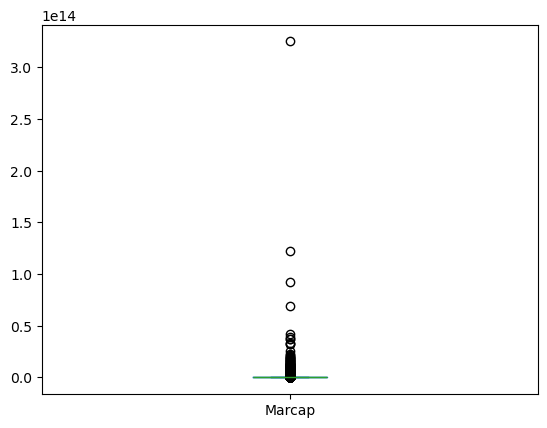

In [12]:
# stocks['Marcap'].plot(kind='box')

In [ ]:
stocks.describe?

In [90]:
# 문자열 컬럼(범주형)에 대한 요약 통계
# count : 컬럼값의 수(nan값은 제외)
# unique : 중복되지 않는 값의 종류(컬럼의 고유값 갯수)
# top : 최빈값(가장 빈번하게 나타나는 값), 모든 컬럼이 unique하다면 최상단 항목이 표시됨
# freq : 최빈값의 빈도

stocks.describe(include='O')

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,MarketId
count,2856,2856,2856,2856,2856,2856,2856,2856
unique,2856,2856,2856,4,10,1997,6,3
top,005930,KR7005930003,삼성전자,KOSDAQ,,2000,2,KSQ
freq,1,1,1,1728,960,11,2013,1776


In [91]:
# 고유값의 목록 확인
print(stocks['ChangeCode'].unique())
print(type(stocks['ChangeCode'].unique()))

['1' '2' '3' '0' '5' '4']
<class 'numpy.ndarray'>


In [15]:
# 고유값의 목록,갯수 확인
print(stocks['ChangeCode'].value_counts())
print(type(stocks['ChangeCode'].value_counts()))

ChangeCode
2    2427
1     219
0     152
3      49
4       5
5       3
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


In [93]:
# 데이터 프레임의 컬럼 메타정보
stocks.columns

Index(['Code', 'ISU_CD', 'Name', 'Market', 'Dept', 'Close', 'ChangeCode',
       'Changes', 'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount',
       'Marcap', 'Stocks', 'MarketId'],
      dtype='object')

In [16]:
# 데이터 프레임의 컬럼의 인덱스 메타정보
stocks.index

RangeIndex(start=0, stop=2855, step=1)

In [32]:
# 컬럼 제거 : 필요없는 행이나 열을 제거
new_stocks = stocks.drop('ISU_CD', axis=1)
new_stocks_desc = stocks_desc.drop(['Name', 'Market'], axis=1)
print(new_stocks.columns)
print(new_stocks_desc.columns)

Index(['Code', 'Name', 'Market', 'Dept', 'Close', 'ChangeCode', 'Changes',
       'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount', 'Marcap',
       'Stocks', 'MarketId'],
      dtype='object')
Index(['Code', 'Sector', 'Industry', 'ListingDate', 'SettleMonth',
       'Representative', 'HomePage', 'Region'],
      dtype='object')


In [ ]:
display(new_stocks_desc)

In [ ]:
display(new_stocks)

In [100]:
stocks_columns = ['Code', 'Name', 'Market', 'Close',
       'Changes', 'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount',
       'Marcap', 'Stocks', 'MarketId'] 

In [101]:
stocks_desc_columns = ['Code','Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region']

In [102]:
stocks_desc.columns

Index(['Code', 'Name', 'Market', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [103]:
stocks_desc = stocks_desc[stocks_desc_columns]

In [104]:
stocks = stocks[stocks_columns]

#### 2개의 데이터 프레임 합치기

- merge : 가로방향으로 열 추가

In [18]:
import pandas as pd

In [ ]:
pd.merge?

In [33]:
#new_stocks join new_stocks_desc

new_stocks = pd.merge(new_stocks,new_stocks_desc)

In [34]:
new_stocks.shape

(2855, 23)

In [108]:
new_stocks.head(1)

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,...,Marcap,Stocks,MarketId,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,005930,삼성전자,KOSPI,,54100,1,400,0.74,53900,54400,...,322965235955000,5969782550,STK,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(...",1975-06-11,12월,한종희,http://www.samsung.com/sec,경기도


In [109]:
new_stocks_desc.head(1)

,Code,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,"측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외",반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시


#### 엑셀로 저장하기

In [36]:
# 엑셀로 저장하기
print(new_stocks.shape)
new_stocks.to_excel('stocks.xlsx',index=False)

(2855, 23)


In [111]:
df = pd.read_excel('stocks.xlsx')

In [112]:
df.shape

(2856, 23)

In [113]:
new_stocks.shape

(2856, 23)

#### CSV로 저장하기

In [35]:
# CSV파일로 저장하기
new_stocks.to_csv('stocks.csv',index=False)